In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('mnist.csv')

In [16]:
df = np.array(df)
m, n = df.shape
np.random.shuffle(df)

test_data = df[0:1000].T
Y_test = test_data[0]
X_test = test_data[1:n]
X_test = X_test / 255.

train_data = df[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 200)

Iteration:  0
[0 0 5 ... 0 5 5] [7 5 6 ... 8 8 3]
0.07651219512195122
Iteration:  10
[7 3 2 ... 3 4 9] [7 5 6 ... 8 8 3]
0.21426829268292683
Iteration:  20
[7 3 2 ... 1 8 3] [7 5 6 ... 8 8 3]
0.3132439024390244
Iteration:  30
[7 3 2 ... 8 8 3] [7 5 6 ... 8 8 3]
0.3722682926829268
Iteration:  40
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.42334146341463413
Iteration:  50
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.4703414634146341
Iteration:  60
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.5096585365853659
Iteration:  70
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.5375609756097561
Iteration:  80
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.5621707317073171
Iteration:  90
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.5841463414634146
Iteration:  100
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.6091951219512195
Iteration:  110
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.6335853658536585
Iteration:  120
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.6565365853658537
Iteration:  130
[7 8 2 ... 8 9 3] [7 5 6 ... 8 8 3]
0.674829268292683
Iteration:  140

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


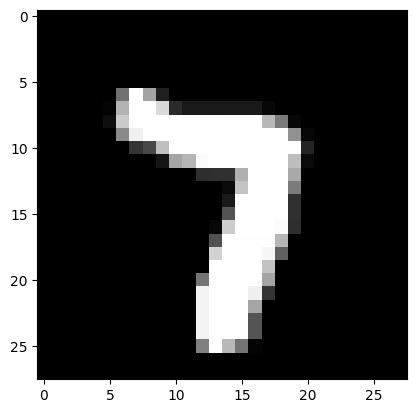

Prediction:  [8]
Label:  5


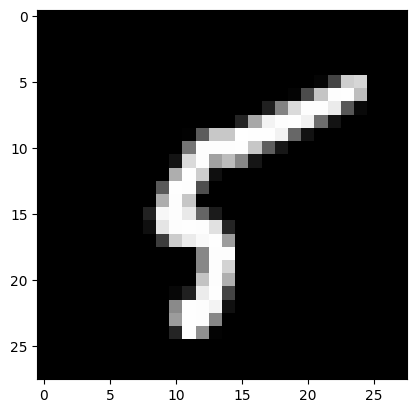

Prediction:  [2]
Label:  6


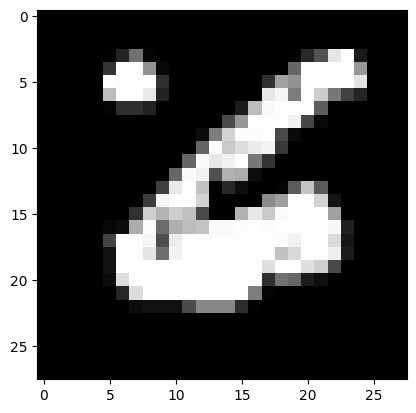

Prediction:  [9]
Label:  9


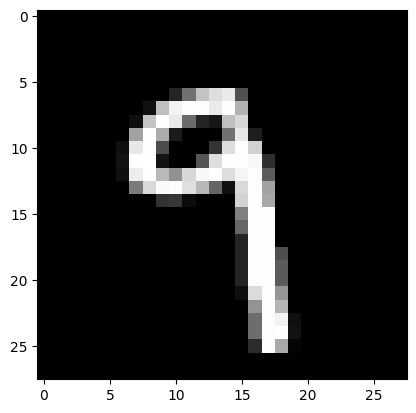

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
print("Accuracy: ", get_accuracy(dev_predictions, Y_test))

[2 6 3 8 6 6 7 1 7 8 3 6 3 2 8 8 7 3 7 7 8 7 3 0 7 1 7 1 3 7 0 8 7 4 6 6 2
 1 9 8 9 5 2 8 5 7 0 8 6 9 3 1 2 9 6 7 7 9 4 3 5 5 3 2 7 8 2 2 8 6 3 7 1 4
 8 4 4 4 4 6 4 3 0 9 6 7 3 6 6 8 0 8 1 9 4 3 8 6 4 4 8 9 1 2 3 4 0 3 4 1 4
 6 1 6 3 0 7 1 3 9 0 8 3 1 4 1 3 4 4 8 6 9 2 9 8 1 7 1 6 6 3 2 1 1 0 3 9 4
 9 4 8 6 1 1 8 4 7 0 6 8 4 6 3 2 1 9 4 0 9 6 6 3 4 0 8 4 4 5 7 8 3 1 4 2 9
 3 2 5 2 5 7 1 6 3 5 1 2 8 6 5 1 8 1 3 1 7 1 4 3 4 8 8 1 8 0 4 1 1 4 8 2 2
 8 5 2 3 7 4 8 8 3 4 9 5 1 0 5 1 1 1 9 9 2 4 6 1 8 4 0 2 3 3 6 0 6 6 4 2 8
 2 0 2 0 3 9 3 6 0 7 9 4 3 3 8 7 7 0 7 4 1 7 7 0 9 6 3 2 0 1 0 6 7 9 7 6 3
 5 0 1 5 8 1 9 9 5 7 0 9 6 3 5 2 1 9 9 2 1 4 6 1 1 7 2 1 5 0 1 5 7 1 4 0 0
 5 7 9 5 7 3 1 5 3 7 3 3 9 8 7 2 1 3 4 9 1 2 0 3 1 4 2 8 1 5 4 1 9 4 0 1 1
 0 9 3 1 9 2 1 9 6 4 3 8 6 3 3 2 9 7 7 2 1 7 4 4 6 7 9 6 1 9 6 2 1 6 3 8 2
 7 9 8 5 4 3 2 7 7 0 0 2 8 8 8 3 1 5 4 9 5 8 7 8 9 2 9 4 1 0 0 4 6 9 0 3 6
 3 5 5 1 1 8 8 0 8 0 9 2 9 9 3 6 6 7 0 9 0 3 0 0 9 5 9 7 7 4 0 2 5 3 7 8 7
 4 6 9 0 8 2 5 0 4 2 3 0 

# Keras

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

In [11]:
nb_classes = 10

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [13]:
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255
print("Training matrix shape", X_train.shape)

X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [14]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [15]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

2024-04-02 15:01:51.633131: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-02 15:01:51.633154: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-02 15:01:51.633158: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-02 15:01:51.633225: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-02 15:01:51.633259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/200


2024-04-02 15:01:52.121797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-02 15:01:52.142744: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-04-02 15:01:52.151713: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


469/469 [==============================] - ETA: 0s - loss: 0.2460 - accuracy: 0.9255

2024-04-02 15:01:56.838893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-02 15:01:56.847665: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-04-02 15:01:56.851771: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


469/469 [==============================] - 5s 10ms/step - loss: 0.2460 - accuracy: 0.9255 - val_loss: 0.1078 - val_accuracy: 0.9675
Epoch 2/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0978 - accuracy: 0.9693 - val_loss: 0.0754 - val_accuracy: 0.9759
Epoch 3/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0679 - accuracy: 0.9787 - val_loss: 0.0710 - val_accuracy: 0.9768
Epoch 4/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0530 - accuracy: 0.9828 - val_loss: 0.0791 - val_accuracy: 0.9762
Epoch 5/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 0.0665 - val_accuracy: 0.9794
Epoch 6/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0741 - val_accuracy: 0.9779
Epoch 7/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0355 - accuracy: 0.9884 - val_loss: 0.0749 - val_accuracy: 0.9782
Epoc

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.29346540570259094
Test accuracy: 0.9866000413894653


In [28]:
predicted_classes = (model.predict(X_test)).astype("int32")
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 2ms/step


/var/folders/21/kkr6yltn3wq_b1bnsqgv3y580000gn/T/ipykernel_84101/221022119.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
/var/folders/21/kkr6yltn3wq_b1bnsqgv3y580000gn/T/ipykernel_84101/221022119.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


Prediction:  [0 0 0 0 0 0 0 1 0 0]
Label:  7


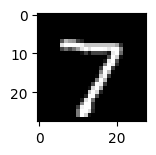

In [29]:
# plt.figure()
# for i, incorrect in enumerate(correct_indices[:9]):
#     plt.subplot(3,3,i+1)
#     plt.gray()
#     plt.imshow(X_test[incorrect].reshape(28,28), interpolation='nearest')
#     print("Prediction: ", predicted_classes[incorrect])
#     print("Label: ", y_test[incorrect])

plt.figure()

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.gray()
    plt.imshow(X_test[incorrect].reshape(28,28), interpolation='nearest')
    print("Prediction: ", predicted_classes[incorrect])
    print("Label: ", y_test[incorrect])